<h1 align=center><font size=5>Data Science and Machine Learning Capstone Project</font></h1>
<h2 align=center><font size=3; color=blue> Copyright &#169; Mustafizur Rahman</font></h2>

<p><b>MULTI CLASS CLASSIFICATION MODEL FOR QUEENS TOP FIVE COMPLAINTS:</b> In this section, I will DEVELOP a classification model using features to predict future Complaint of top five complaint Type</p>

<h4>Import pandas</h4> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline 
# importing necessary libraries 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

<h2>Import data from previous model where I save Clean data for analysis, visualization and Modeling.</h2>

In [2]:
filename='C:\\Users\\TOPU\Documents\\GitHub\\5. Data Science and Machine Learning Capstone Project\\Queens_Merged_top5_df.csv'

Use the Pandas method <b>read_csv()</b> to load the data from local drive.

In [3]:
df= pd.read_csv(filename)
df.head()

,Complaint Type,Address,Borough,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,...,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,BldAge,RenvAge
0,1,87-15 37 AVENUE,QN,0.006136,0.013475,0.00251,0.0,0.32,35,0.000093,...,0.029268,0.005199,0.012972,0.286667,0.0,1955,0,11372.0,0.181058,0.0
1,1,87-15 37 AVENUE,QN,0.006136,0.013475,0.00251,0.0,0.32,35,0.000093,...,0.029268,0.005199,0.012972,0.286667,0.0,1955,0,11372.0,0.181058,0.0
2,3,87-15 37 AVENUE,QN,0.006136,0.013475,0.00251,0.0,0.32,35,0.000093,...,0.029268,0.005199,0.012972,0.286667,0.0,1955,0,11372.0,0.181058,0.0
3,1,87-15 37 AVENUE,QN,0.006136,0.013475,0.00251,0.0,0.32,35,0.000093,...,0.029268,0.005199,0.012972,0.286667,0.0,1955,0,11372.0,0.181058,0.0
4,1,87-15 37 AVENUE,QN,0.006136,0.013475,0.00251,0.0,0.32,35,0.000093,...,0.029268,0.005199,0.012972,0.286667,0.0,1955,0,11372.0,0.181058,0.0


In [4]:
print(df.columns)
df.describe(include=['object'])

Index(['Complaint Type', 'Address', 'Borough', 'BldgArea', 'BldgDepth',
       'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR',
       'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'BldAge',
       'RenvAge'],
      dtype='object')


,Address,Borough
count,434917,434917
unique,15731,1
top,34 ARDEN STREET,MN
freq,12340,434917


Use the Pandas method <b>read_csv()</b> to load the data from local drive.

In [33]:
# print('sklearn: {}'.format(sklearn.__version__))
# df = df.apply(pd.to_numeric, errors='coerce')

sklearn: 0.21.3


In [4]:
df['Complaint Type'].value_counts()

1    126380
2     60697
3     58826
4     50714
0     33787
Name: Complaint Type, dtype: int64

<p>

Select all features for the modeling. Also check the target data type (should be integer, as it is a requirement  by the skitlearn algorithm)</p>
<b>FEATURE SETS:BldgArea	BldgDepth	BuiltFAR	CommFAR	FacilFAR	LotArea	LotDepth	NumBldgs	NumFloors	OfficeArea	ResArea	ResidFAR	RetailArea	BldAge and	RenvAge</b>


In [5]:
feature_cols = ['BldgDepth','BuiltFAR', 'LotDepth', 'NumFloors', 'ResArea', 'BldAge']
#feature_cols = ['BldgDepth','BuiltFAR', 'NumFloors', 'ResArea', 'BldAge']
X=df[feature_cols]
y=df['Complaint Type']
print(X[0:5])
print(y [0:25])
print ('Feature Set:', X.shape)
print ('Label set:', y.shape)

   BldgDepth  BuiltFAR  LotDepth  NumFloors   ResArea    BldAge
0   0.013475   0.00251  0.010001   0.029268  0.012972  0.181058
1   0.013475   0.00251  0.010001   0.029268  0.012972  0.181058
2   0.013475   0.00251  0.010001   0.029268  0.012972  0.181058
3   0.013475   0.00251  0.010001   0.029268  0.012972  0.181058
4   0.013475   0.00251  0.010001   0.029268  0.012972  0.181058
0     1
1     1
2     3
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    3
12    3
13    0
14    0
15    0
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
Name: Complaint Type, dtype: int64
Feature Set: (330404, 6)
Label set: (330404,)


## Train/Test split

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
#print('sklearn: {}'.format(sklearn.__version__))
# split X and y into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print(y.shape)

Train set: (297363, 6) (297363,)
Test set: (33041, 6) (33041,)
(330404,)


<h2 id="pattern_visualization"> XGBoost Multiclass classifier</h2>

Decision tree classifier is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split. In the following code snippet, I train a decision tree classifier in scikit-learn.Although XGBoost is among many solutions in machine learning problems, one could find it less trivial to implement its booster for multiclass or multilabel classification as it’s not directly implemented to the Python API XGBClassifier.

<b>To use XGBoost main module for a multiclass classification problem, it is needed to change the value of two parameters: objective and num_class.</b>


In [7]:
import xgboost as xgb
#Split data for the train and test sets and get our dmatrices.
#DMatrix, it is a data interface commonly used as input in XGBoost models, 
#it works well with Pandas dataframes, Numpy arrays, SciPy arrays, CSV files, etc.

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

# from xgboost.sklearn import  XGBClassifier
# from sklearn.preprocessing import LabelEncoder
# from sklearn import cross_validation, metrics
# from sklearn.grid_search import GridSearchCV
# n_classes_ = len(np.unique(y_train))
# xgb_model = xgb.XGBClassifier(objective='multi:softmax')
# xgb_params = [{'num_class': n_classes_}]
# xgb_params  = [
#     {    
#     "n_estimators": range(50, 501, 50),
#     }
# ]
# #cv
# cv = cross_validation.StratifiedShuffleSplit(y_train, n_iter=5, test_size=0.3, random_state=42)

# xgb_grid = grid_search.GridSearchCV(xgb_model, xgb_params,cv=cv, n_jobs=-1, verbose=3)
# xgb_grid.fit(X_train, y_train)

Time to set our XGBoost parameters to perform multiclass predictions!

In [8]:
# xgb_params = [{'num_class': n_classes_}]
# xgb_params  = [
#     {    
#     "n_estimators": range(50, 501, 50),
#     }
# ]

params = {
    'max_depth': 20,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 5,
    'n_gpus': 0
}

<b>Now it’s time to train our model and see how it goes.</b>

In [9]:
xgbst = xgb.train(params, dtrain)
y_pred_xgbst = xgbst.predict(dtest)
print(y_pred_xgbst[0:10])
print(y_test[0:10])

[1. 1. 1. 1. 1. 1. 4. 1. 3. 1.]
248323    0
311847    1
240347    3
15086     1
234610    2
132616    1
200828    0
109461    1
152728    0
266085    1
Name: Complaint Type, dtype: int64


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgbst))

              precision    recall  f1-score   support

           0       0.43      0.27      0.33      3330
           1       0.55      0.81      0.66     12628
           2       0.52      0.36      0.42      6104
           3       0.41      0.31      0.35      5896
           4       0.48      0.35      0.41      5083

    accuracy                           0.51     33041
   macro avg       0.48      0.42      0.43     33041
weighted avg       0.50      0.51      0.49     33041



In [11]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_xgbst))

0.5132713900910989


<h2 id="pattern_visualization"> Confusion Matrix for XGBoost classifier</h2>

[[  894  1052   410   770   204]
 [  176 10254   750   719   729]
 [  368  2640  2179   592   325]
 [  503  2297   585  1841   670]
 [  130  2270   300   592  1791]]


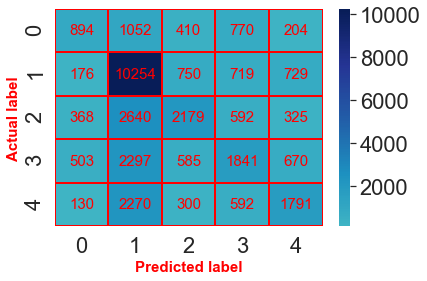

In [12]:
# creating a confusion matrix 
cm_xgboost = confusion_matrix(y_test, y_pred_xgbst)
print(cm_xgboost)
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_xgboost, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization"> SVM (Support vector machine) Multiclass classifier</h2>
SVM (Support vector machine) is an efficient classification method when the feature vector is high dimensional. In sci-kit learn, we can specify the kernel function (here, linear).

In [ ]:
# training a linear SVM classifier 
from sklearn.svm import SVC 
#svm_model_linear = SVC(kernel = 'rbf', C = 1,gamma=0.01).fit(X_train, y_train)
svm_model_linear = SVC(kernel = 'linear', C = 1,gamma='auto').fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)  
# creating a confusion matrix 
cm_svm = confusion_matrix(y_test, svm_predictions)

In [ ]:
print(classification_report(y_test, svm_predictions))

In [ ]:
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_svm, linewidths=2.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization"> KNN (k-nearest neighbours) classifier</h2>
KNN or k-nearest neighbours is the simplest classification algorithm. This classification algorithm does not depend on the structure of the data. Whenever a new example is encountered, its k nearest neighbours from the training data are examined. Distance between two examples can be the euclidean distance between their feature vectors. The majority class among the k nearest neighbours is taken to be the class for the encountered example.

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm_knn = confusion_matrix(y_test, knn_predictions) 
print(cm_knn)

0.4768620804455071
[[1229  865  457  592  187]
 [ 614 9241 1066  868  839]
 [ 655 2309 2208  591  341]
 [ 910 2062  711 1570  643]
 [ 353 2068  388  766 1508]]


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.33      0.37      0.35      3330
           1       0.56      0.73      0.63     12628
           2       0.46      0.36      0.40      6104
           3       0.36      0.27      0.31      5896
           4       0.43      0.30      0.35      5083

    accuracy                           0.48     33041
   macro avg       0.43      0.41      0.41     33041
weighted avg       0.46      0.48      0.46     33041



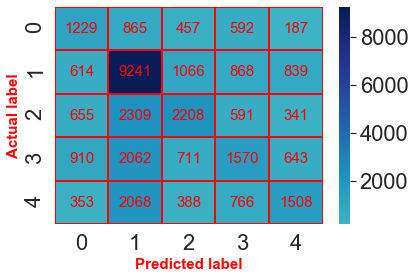

In [15]:
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_knn, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization"> Naive Bayes classifier</h2>
Naive Bayes classification method is based on Bayes’ theorem. It is termed as ‘Naive’ because it assumes independence between every pair of feature in the data. 

In [16]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
cm_nb = confusion_matrix(y_test, gnb_predictions) 

0.19493962047153537


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3330
           1       0.44      0.05      0.08     12628
           2       0.18      0.96      0.31      6104
           3       0.17      0.00      0.00      5896
           4       0.75      0.00      0.00      5083

    accuracy                           0.19     33041
   macro avg       0.31      0.20      0.08     33041
weighted avg       0.35      0.19      0.09     33041



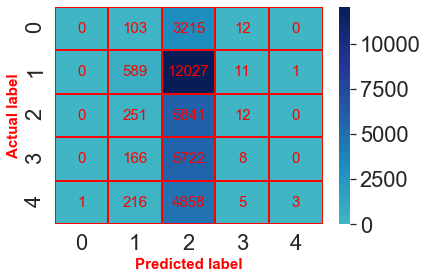

In [18]:
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_nb, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization">Here I use Multi-class classification without a classifier!</h2>
Almost all model including XGBoost produces result with only ~40% accuracy 

Lets try <b>one-vs-rest xgboost classifiers</b>

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.multiclass import OneVsRestClassifier
# xgb_classifier = OneVsRestClassifier(XGBClassifier())
# #xgb_classifier.fit(np.array(training_inputs), training_outputs_labels)
# #X_train, X_test, y_train, y_test 
# xgb_classifier.fit(np.array(X_train), y_train)
# xbg_predictions_labels = xgb_classifier.predict(X_test)
# print(xbg_predictions_labels[0:30])

# SVM for multi-class classification using one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = SVC(kernel = 'linear', C = 1,gamma='auto')
# define ovo strategy
ovo = OneVsOneClassifier(model)
# fit model
ovo.fit(X_train, y_train)
# make predictions
yhat_svm = ovo.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_svm))

In [ ]:
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 

<hr>
<p>Copyright &copy; 2020 Mustafizur Rahman <a href="https://www.linkedin.com/in/dr-mohammad-rahman-2434b313/">LinkedIn</a>.</p>